<a href="https://colab.research.google.com/github/Naduli48/Telco_customer_churn_prediction/blob/main/Telco_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np  #for numerical operations
import pandas as pd #for all data manipulation, cleaning and preparation
import matplotlib.pyplot as plt #to display plots
import seaborn as sns #for create plots

#ML preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler  #convert catagorycal to numerical values/scalind numerical features
from sklearn.model_selection import  train_test_split

#ML models and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  #for hyperparameter tuning/neural network tuning
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve

#keras and tensorflow Neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/ML/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#number of columns and rows
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
#Since the total charges column is categorical, it needs to be changed to a numerical format.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
 #errors = 'coerce' argumebt tells pandas to replace any string that cannot be concerted to a number with NaN.

In [11]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)
# The rows that are NaN are the new customers. Fill them with median

/tmp/ipython-input-3194511606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)


In [12]:
#customer ID has no predictive value
df.drop(columns = ['customerID'], inplace=True)

In [13]:
#Replace 'no' with specific terms, such as 'no internet service,' etc.
service_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in service_cols:
  df[col] = df[col].replace('No internet service','No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

In [14]:
#dupliacte rows
df.duplicated().sum()

np.int64(22)

In [15]:
print(f"Original number of rows: {len(df)}")

# Remove duplicate rows, keeping the first occurrence
df.drop_duplicates(inplace=True)

print(f"Number of rows after removing duplicates: {len(df)}")

Original number of rows: 7043
Number of rows after removing duplicates: 7021


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   object 
 17  

In [32]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,32.469449,0.902863,0.592651,64.851894,2288.954490,0.264492
std,0.500017,0.368947,0.499797,0.458520,24.534965,0.296166,0.491376,30.069001,2265.319449,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.750000,411.150000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.400000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3801.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [34]:
df.shape

(7021, 20)

Churn count : 
 Churn
No     5164
Yes    1857
Name: count, dtype: int64

churn_percentage : 
 Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64


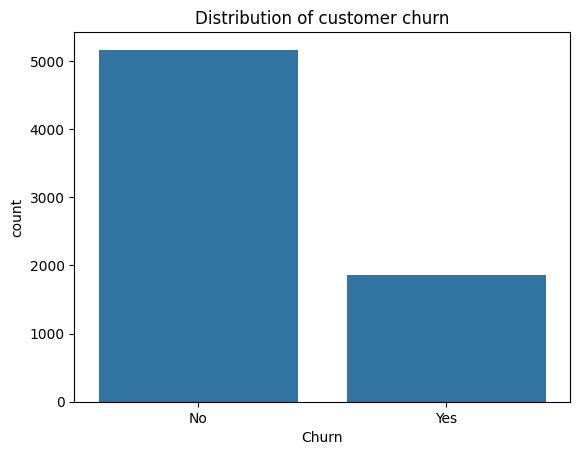

In [16]:
#Display churn count and Churn percentage
churn_count = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True)*100

print("Churn count : \n",churn_count)
print("\nchurn_percentage : \n",churn_percentage)

sns.countplot(x='Churn',data=df)
plt.title("Distribution of customer churn")
plt.show()

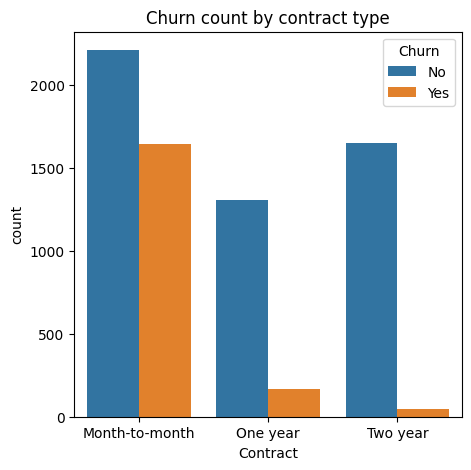

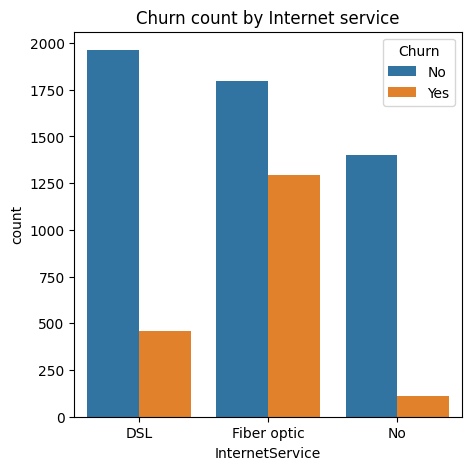

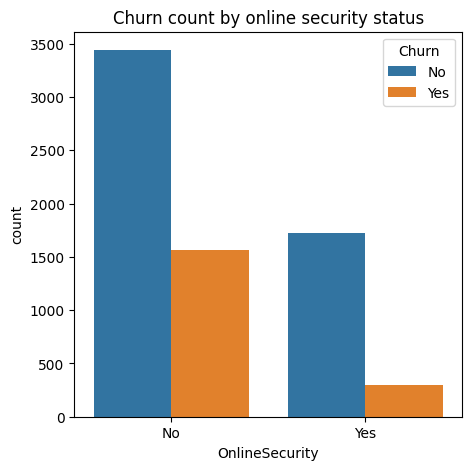

In [17]:
#Catatgorical vs Churn
#Churn according to contract type
plt.figure(figsize=(5,5))
sns.countplot(x = "Contract", hue = "Churn", data= df)
plt.title("Churn count by contract type")
plt.show()

#Churn according to internet service
plt.figure(figsize=(5,5))
sns.countplot(x = "InternetService", hue = "Churn", data= df)
plt.title("Churn count by Internet service")
plt.show()

#Churn according to online security
plt.figure(figsize=(5,5))
sns.countplot(x = "OnlineSecurity", hue = "Churn", data= df)
plt.title("Churn count by online security status")
plt.show()

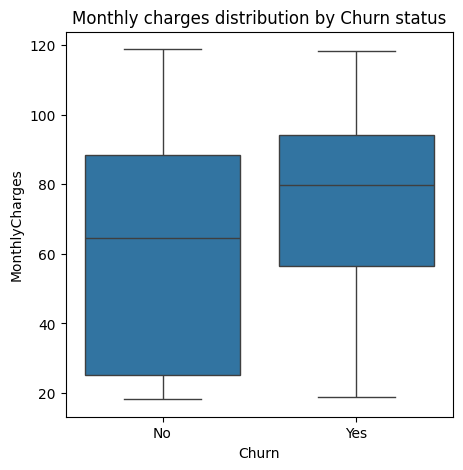

In [18]:
#Numerical vs Churn
#Churn according to online security
plt.figure(figsize=(5,5))
sns.boxplot(x = "Churn", y = "MonthlyCharges", data= df)
plt.title("Monthly charges distribution by Churn status")
plt.show()

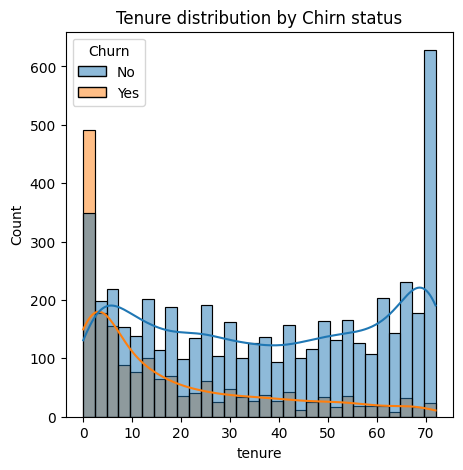

In [19]:
#Tenure (duration of the customer)
plt.figure(figsize=(5,5))
sns.histplot(x = "tenure", hue = "Churn", data= df,  kde = True, bins = 30)
plt.title("Tenure distribution by Chirn status")
plt.show()

In [20]:
#convert yes/ no to 1/0 for correlato matrix
df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})

/tmp/ipython-input-339924526.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes':1, 'No':0})


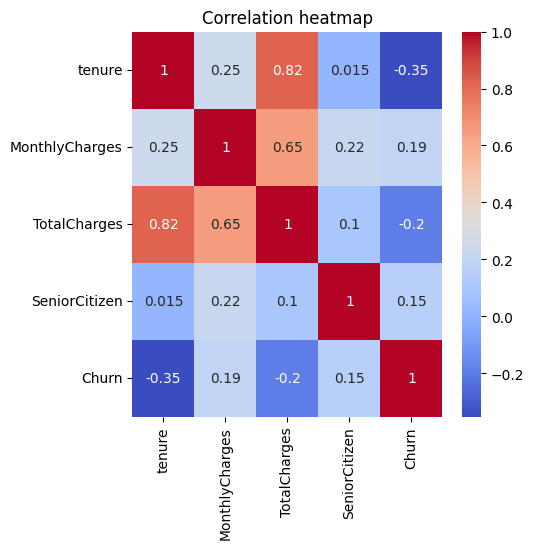

In [21]:
#correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Churn']].corr(),annot = True, cmap = 'coolwarm')
plt.title('Correlation heatmap')
plt.show()

In [22]:
#Outlier detection(IQR method)
for col in ['MonthlyCharges','TotalCharges']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 +1.5 *IQR

  df[col] = np.where(df[col]>upper_bound, upper_bound,df[col])
print("Outlier capping applied to : MonthlyCharges, TotalCharges")

Outlier capping applied to : MonthlyCharges, TotalCharges


In [35]:
#label encoding for binary columns
#decision tree needs numerical inputs
binary_cols = ['gender','Partner','Dependant','PhoneService','PaperlessBilling']
for col in binary_cols:
  if col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [40]:
#one-hot encode
#turnign categorical columns into numerical
multi_cols = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
present_multi = [c for c in multi_cols if c in df.columns]
df_encoded = pd.get_dummies(df, columns=present_multi, drop_first=True)

#Seperate features and targets
x= df_encoded.drop('Churn', axis= 1)
y = df_encoded['Churn']

In [42]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42,stratify=y)

In [46]:
#Scale numerical columns
scaler = StandardScaler()
scale_cols = ['tenure', 'MonthlyCharges','TotalCharges']
x_train[scale_cols] = scaler.fit_transform(x_train[scale_cols])
x_test[scale_cols] = scaler.fit_transform(x_test[scale_cols])

print("x_train : ",x_train.shape, "\nx_test :",x_test.shape)

x_train :  (5265, 23) 
x_test : (1756, 23)


In [49]:
#Decision tree
dt_param_grid = {
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,10,20],
    'criterion': ['gini','entropy']
}

dt_clf = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt_clf, dt_param_grid, cv=5, scoring='roc_auc',n_jobs=-1)
dt_grid.fit(x_train,y_train)

best_dt = dt_grid.best_estimator_
print("Decision tree best params : ",dt_grid.best_params_)
print("Decision tree CV best ROC-AUC : ",dt_grid.best_score_)

Decision tree best params :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Decision tree CV best ROC-AUC :  0.8236547738053618


In [51]:
#Evaluate on test set
dt_proba = best_dt.predict_proba(x_test)[:,1]
dt_pred = best_dt.predict(x_test)
print("Decision tree test ROC-AUC : ",roc_auc_score(y_test, dt_proba))
print("Decision tree classification report : \n",classification_report(y_test,dt_pred))

Decision tree test ROC-AUC :  0.830520377388705
Decision tree classification report : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1292
           1       0.63      0.50      0.56       464

    accuracy                           0.79      1756
   macro avg       0.73      0.70      0.71      1756
weighted avg       0.78      0.79      0.78      1756



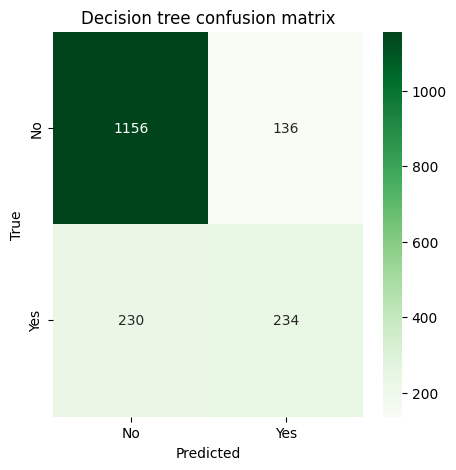

In [57]:
#Confusion matrix
cm_dt = confusion_matrix(y_test,dt_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Greens", xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.title('Decision tree confusion matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [58]:
from sklearn import metrics
#Neural network
input_dim = x_train.shape[1]

def build_nn(input_dim, neurons=64, dropout_rate=0.2, lr =0.001):
  model = Sequential()
  model.add(Dense(neurons, activation='relu', input_shape=(input_dim,)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(max(16,neurons//2), activation='relu'))
  model.add(Dropout(dropout_rate/2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer =Adam(learning_rate=lr), loss='binary_crossentropy', metrics = ['AUC'])
  return model

In [59]:
#Compute class weight to balance in training
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weight))
print("Class weights : ",class_weight_dict)

Class weights :  {0: np.float64(0.6798811983471075), 1: np.float64(1.8898061737257716)}


In [60]:
#Instantiate model
nn= build_nn(input_dim=input_dim, neurons=64, dropout_rate=0.2, lr =0.001)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
#Early stopping callback
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=6,restore_best_weights=True)

In [63]:
from gc import callbacks
#Fit model
history = nn.fit(
    x_train, y_train,
    validation_split = 0.15,
    epochs=80,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=[es],
    verbose=2
)

Epoch 1/80
70/70 - 3s - 39ms/step - AUC: 0.7501 - loss: 0.5957 - val_AUC: 0.8329 - val_loss: 0.5284
Epoch 2/80
70/70 - 0s - 4ms/step - AUC: 0.8212 - loss: 0.5192 - val_AUC: 0.8438 - val_loss: 0.5205
Epoch 3/80
70/70 - 0s - 6ms/step - AUC: 0.8301 - loss: 0.5067 - val_AUC: 0.8477 - val_loss: 0.5038
Epoch 4/80
70/70 - 0s - 6ms/step - AUC: 0.8335 - loss: 0.5022 - val_AUC: 0.8489 - val_loss: 0.5087
Epoch 5/80
70/70 - 0s - 5ms/step - AUC: 0.8393 - loss: 0.4965 - val_AUC: 0.8496 - val_loss: 0.5067
Epoch 6/80
70/70 - 0s - 6ms/step - AUC: 0.8406 - loss: 0.4929 - val_AUC: 0.8499 - val_loss: 0.4952
Epoch 7/80
70/70 - 0s - 6ms/step - AUC: 0.8435 - loss: 0.4889 - val_AUC: 0.8500 - val_loss: 0.4937
Epoch 8/80
70/70 - 0s - 7ms/step - AUC: 0.8442 - loss: 0.4886 - val_AUC: 0.8518 - val_loss: 0.5128
Epoch 9/80
70/70 - 1s - 8ms/step - AUC: 0.8463 - loss: 0.4834 - val_AUC: 0.8515 - val_loss: 0.5023
Epoch 10/80
70/70 - 0s - 7ms/step - AUC: 0.8471 - loss: 0.4832 - val_AUC: 0.8493 - val_loss: 0.5280
Epoch 11

In [65]:
#Evaluate neural network
nn_proba = nn.predict(x_test).ravel()
nn_pred = (nn_proba >= 0.5).astype(int)
print("Neural network test ROC-AUC", roc_auc_score(y_test, nn_proba))
print("Neural network classification report : \n",classification_report(y_test, nn_pred))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural network test ROC-AUC 0.8444998065015479
Neural network classification report : 
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1292
           1       0.51      0.77      0.61       464

    accuracy                           0.74      1756
   macro avg       0.70      0.75      0.71      1756
weighted avg       0.80      0.74      0.76      1756



/tmp/ipython-input-3777876207.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


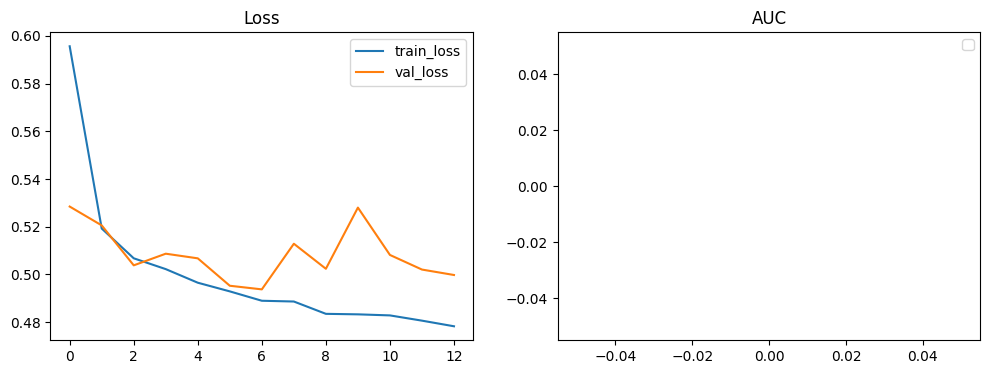

In [69]:
#Plot training history (loss and AUC)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history.get('auc',[]),label = 'train_auc' if 'auc' in history.history else '')
plt.plot(history.history.get('val_auc',[]),label = 'val_auc' if 'val_auc' in history.history else '')
plt.title('AUC')
plt.legend()
plt.show()

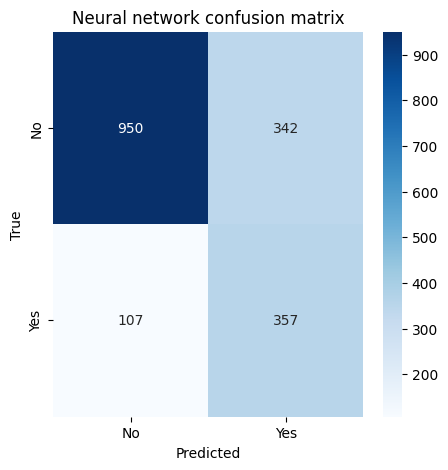

In [74]:
#Confusion matrix for neural network
cm_nn = confusion_matrix(y_test,nn_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap="Blues", xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.title('Neural network confusion matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

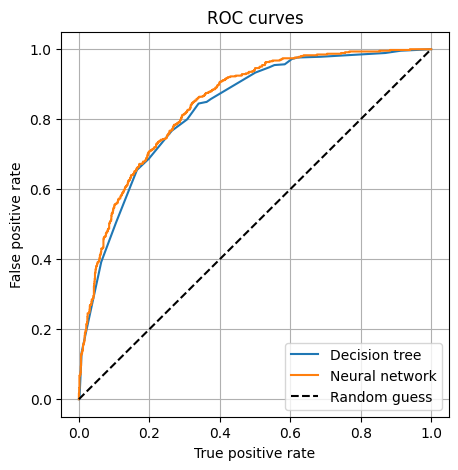

In [84]:
#ROC curves comparison
fpr_dt, tpr_dt, _ = roc_curve(y_test,dt_proba)
fpr_nn, tpr_nn, _ = roc_curve(y_test,nn_proba)
plt.figure(figsize=(5,5))
plt.plot(fpr_dt, tpr_dt, label = 'Decision tree')
plt.plot(fpr_nn, tpr_nn, label = 'Neural network')
plt.plot([0,1],[0,1],'k--', label='Random guess')
plt.ylabel('False positive rate')
plt.xlabel('True positive rate')
plt.title('ROC curves')
plt.legend()
plt.grid()
plt.show()